# BISM Lecture 3
**Script for reploting lecture 3**

In [1]:
#load libraries
library(ggplot2)
library(dplyr)
library(grid)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Step 1: original plot

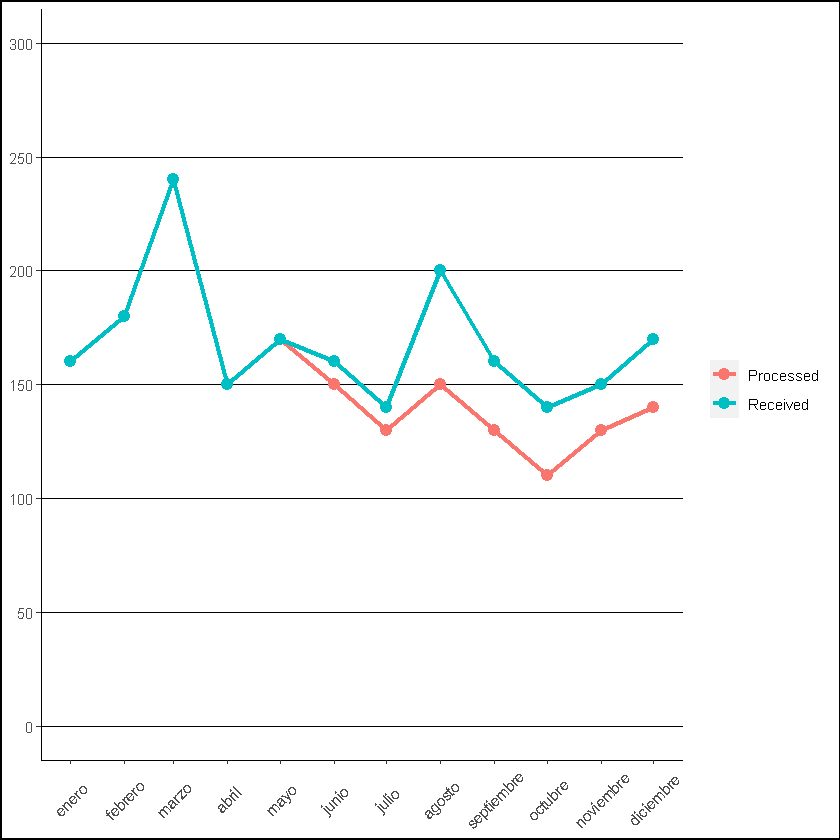

In [2]:
df_tickets3=data.frame(values=c(160,180,240,150,170,150,130,150,130,110,130,140,
                                160,180,240,150,170,160,140,200,160,140,150,170),
                       category=factor(c(rep("Processed",12),rep("Received",12)),
                                       levels=c("Processed","Received")),
                       date=rep(seq.Date(as.Date("2019-01-01"), as.Date("2019-12-01"), by = "month"),2)
)


plt_ticket=ggplot(df_tickets3,aes(x=date,y=values,colour=category))+  
  geom_line(size=1.3)+
  scale_y_continuous(breaks = seq(0,300,50),limits=c(0,300))+ #adjust the y scale
  xlab(NULL) + 
  ylab(NULL)

  
#filter the dataset from August
df_tickets_rec = df_tickets3 %>%
  filter(date %in% seq.Date(as.Date("2019-08-01"), as.Date("2019-12-01"), by = "month") & category %in% "Received")
df_tickets_prc = df_tickets3 %>%
  filter(date %in% seq.Date(as.Date("2019-08-01"), as.Date("2019-12-01"), by = "month") & category %in% "Processed")


#step 1: original plot
plt_ticket+
  geom_point(size=3)+
  scale_x_date(date_labels = "%B",date_breaks = "1 month")+ #adjust the x scale 
  theme(panel.background = element_blank(),
        panel.grid.major.y = element_line(colour="black"),
        panel.grid.major.x = element_blank(),
        axis.text.x = element_text(angle = 45,vjust = 0.5),
        legend.title=element_blank(),
        axis.line = element_line(colour="black"),
        plot.background = element_rect(
          colour = "black",
          size = 1
        )
  )


## Step 2: remove chart borders

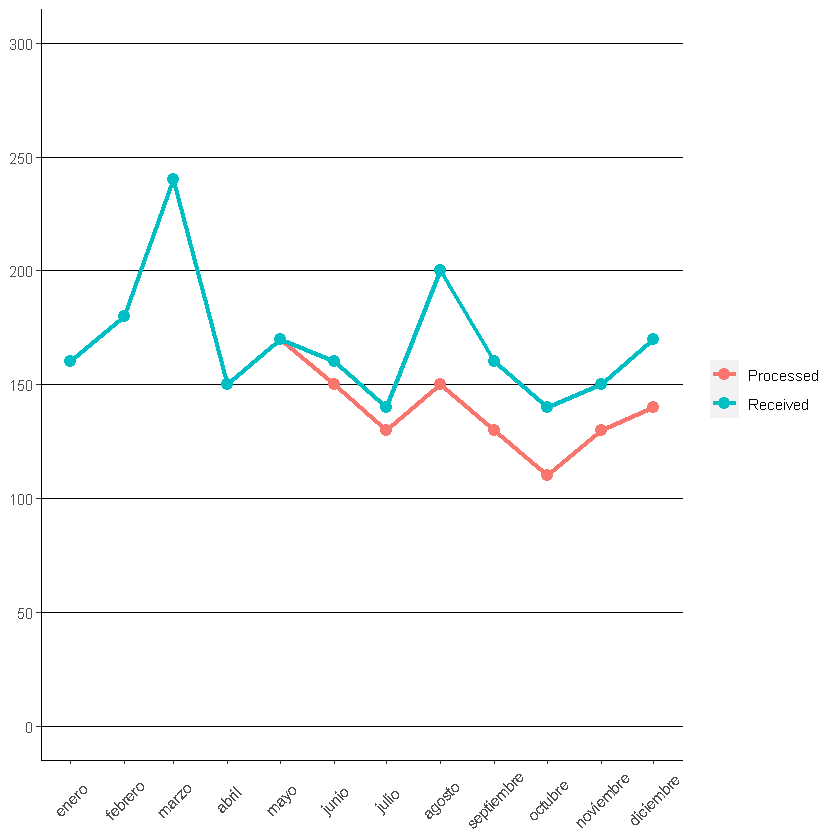

In [4]:
plt_ticket+
  geom_point(size=3)+
  scale_x_date(date_labels = "%B",date_breaks = "1 month")+ #adjust the x scale 
  theme(panel.background = element_blank(),
        panel.grid.major.y = element_line(colour="black"),
        panel.grid.major.x = element_blank(),
        axis.text.x = element_text(angle = 45,vjust = 0.5),
        legend.title=element_blank(),
        axis.line = element_line(colour="black"),
        plot.background = element_blank()
  )

## Step 3: remove gridlines  

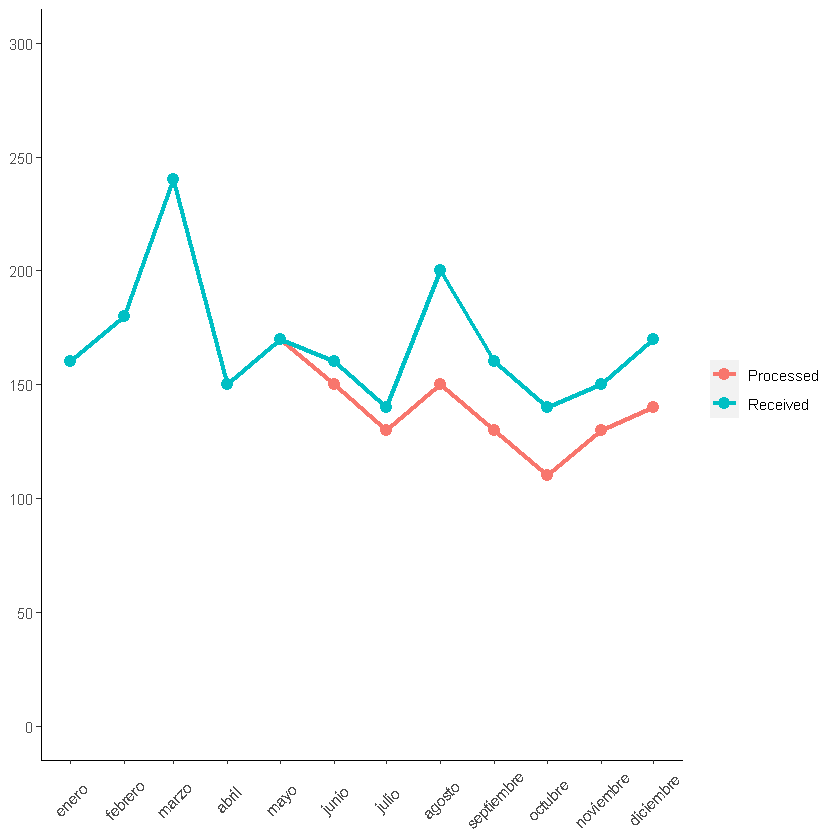

In [5]:
plt_ticket+
  geom_point(size=3)+
  scale_x_date(date_labels = "%B",date_breaks = "1 month")+ #adjust the x scale 
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        axis.text.x = element_text(angle = 45,vjust = 0.5),
        legend.title=element_blank(),
        axis.line = element_line(colour="black"),
        plot.background = element_blank()
  )


## Step 4: remove data markers

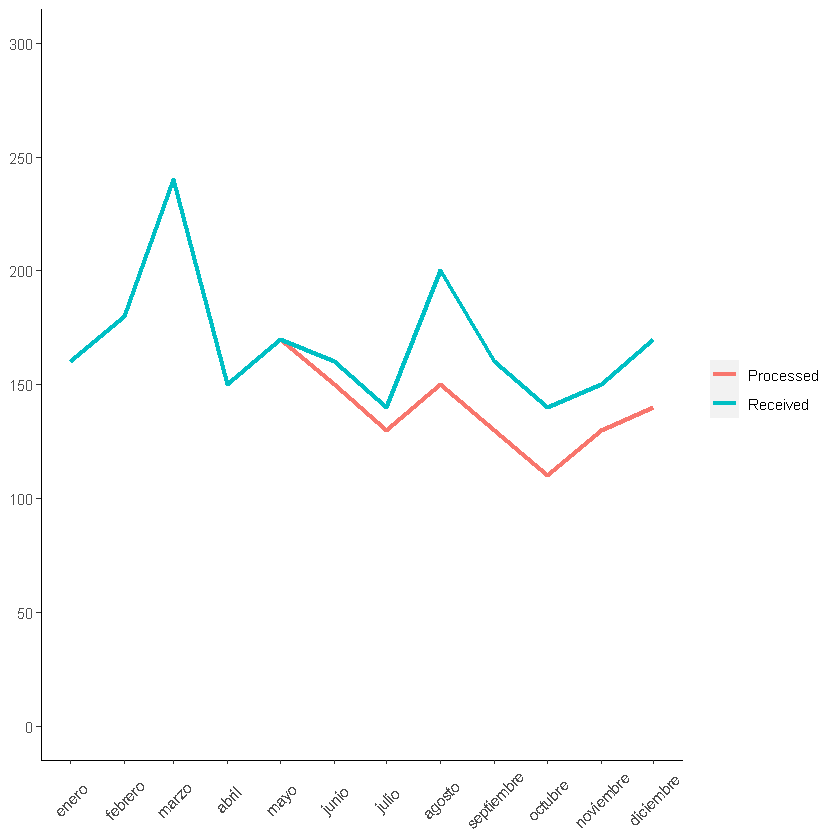

In [6]:
plt_ticket+
  scale_x_date(date_labels = "%B",date_breaks = "1 month")+ #adjust the x scale 
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        axis.text.x = element_text(angle = 45,vjust = 0.5),
        legend.title=element_blank(),
        axis.line = element_line(colour="black"),
        plot.background = element_blank()
  )


## Step 5: clean up axis labels

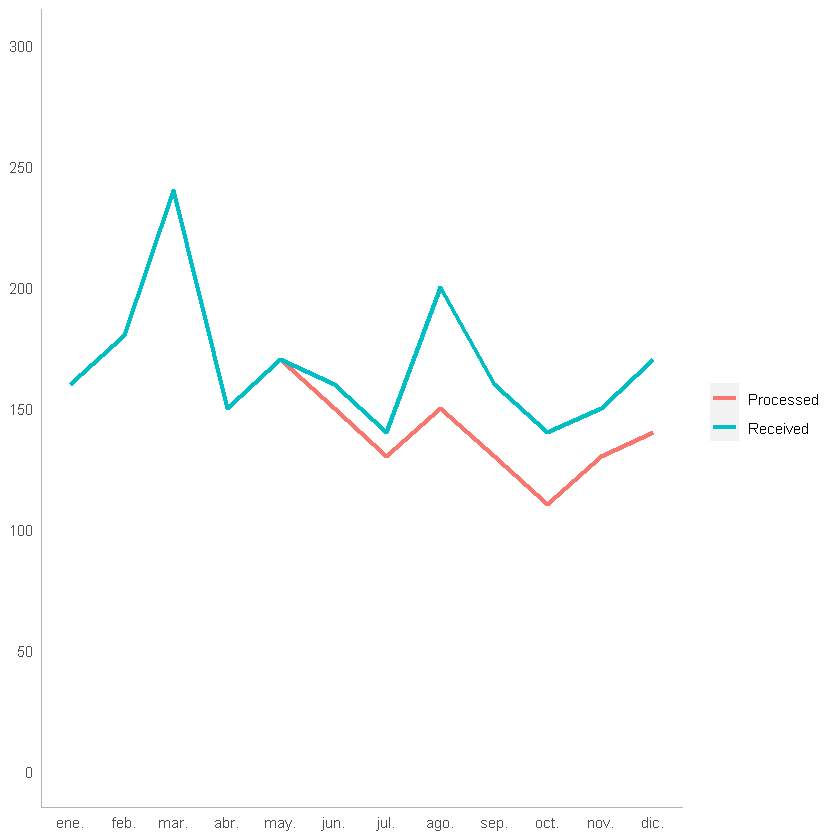

In [7]:
plt_ticket+
  scale_x_date(date_labels = "%h",date_breaks = "1 month")+ #adjust the x scale 
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        legend.title=element_blank(),
        axis.line = element_line(colour="grey70"),
        axis.ticks = element_blank(),
        plot.background = element_blank()
  )

## Step 6: label data directly

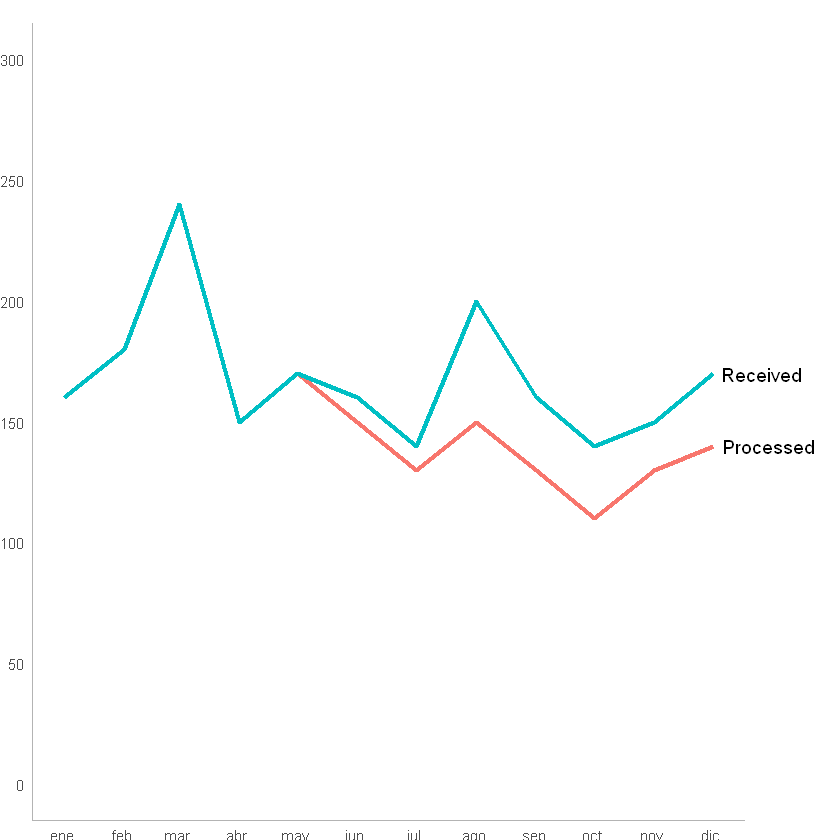

In [8]:
plt_ticket+
  scale_x_date(date_labels = "%h",date_breaks = "1 month")+ #adjust the x scale 
  annotate("text",x=as.Date("2019-12-01"),y=170,label="Received",hjust=-0.1,size=4)+
  annotate("text",x=as.Date("2019-12-01"),y=140,label="Processed",hjust=-0.1,size=4)+
  
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        legend.title=element_blank(),
        axis.line = element_line(colour="grey70"),
        axis.ticks = element_blank(),
        legend.position="none",
        plot.margin = unit(c(0.5,2,0,0), "cm"),
        plot.background = element_blank()
  )+
  coord_cartesian(clip = "off") #allows to plot a label outside the x,y limits

## Step 7: leverage consistent colour

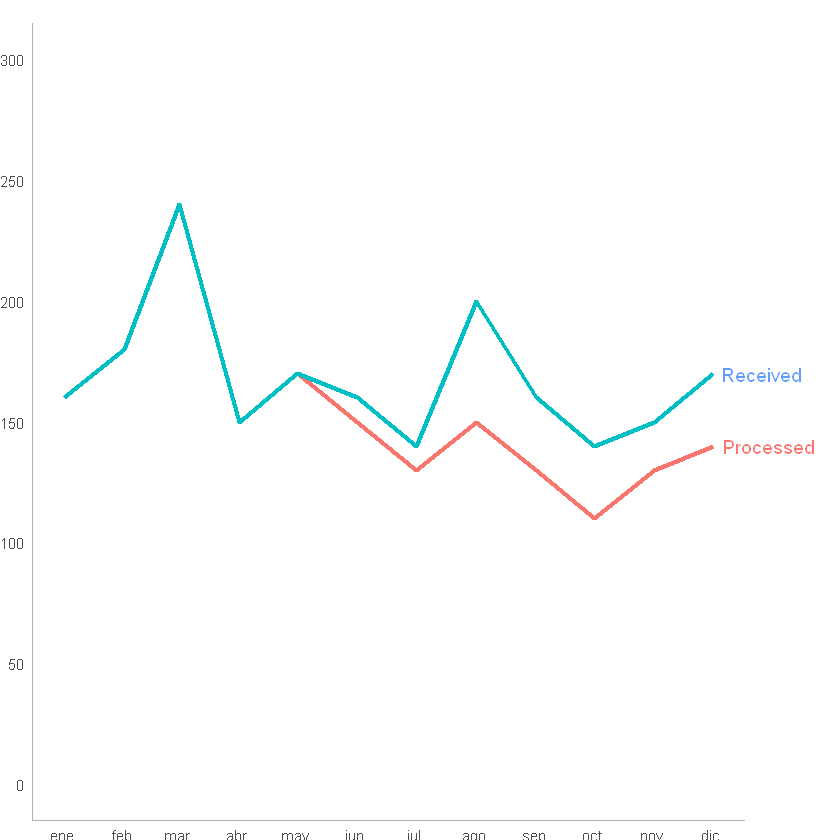

In [9]:
plt_ticket+
  scale_x_date(date_labels = "%h",date_breaks = "1 month")+ #adjust the x scale 
  annotate("text",x=as.Date("2019-12-01"),y=170,label="Received",hjust=-0.1,size=4,colour="#619CFF")+
  annotate("text",x=as.Date("2019-12-01"),y=140,label="Processed",hjust=-0.1,size=4,colour="#F8766D")+
  
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        legend.title=element_blank(),
        axis.line = element_line(colour="grey70"),
        axis.ticks = element_blank(),
        legend.position="none",
        plot.margin = unit(c(0.5,2,0,0), "cm"),
        plot.background = element_blank()
  )+
  coord_cartesian(clip = "off") #allows to plot a label outside the x,y limits

## Step 8: modify the colour

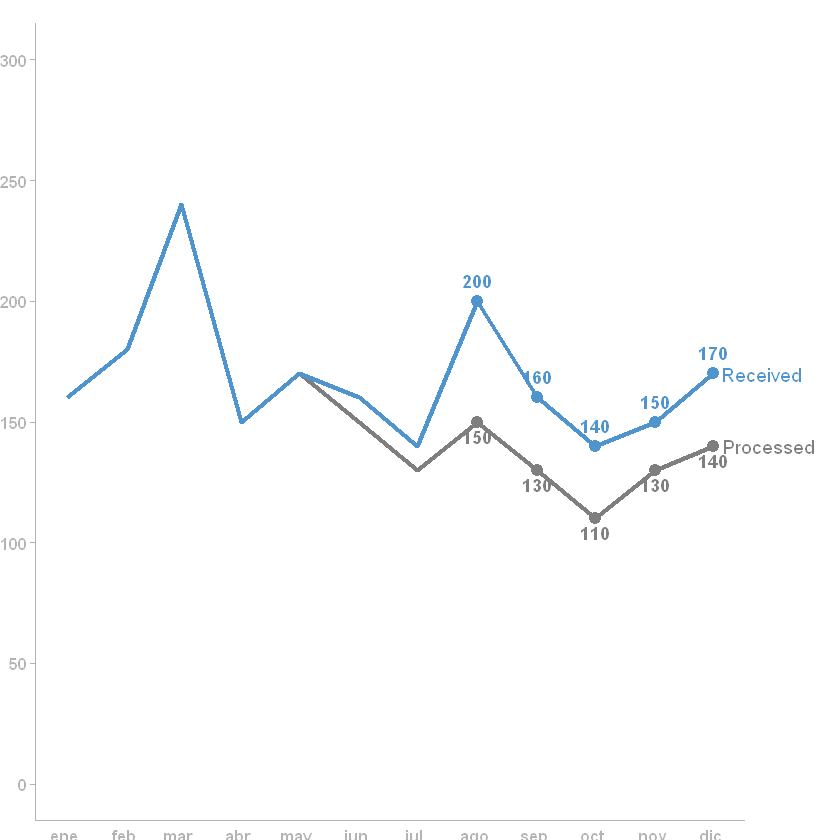

In [12]:
ggplot(df_tickets3,aes(x=date,y=values,colour=category))+  
  geom_line(size=1.3)+
  scale_y_continuous(breaks = seq(0,300,50),limits=c(0,300))+ #adjust the y scale
  xlab(NULL) + 
  ylab(NULL)+
  
  scale_colour_manual(values = c("grey50","steelblue3"),guide=FALSE)+
  
  scale_x_date(date_labels = "%h",date_breaks = "1 month")+ #adjust the x scale 
  annotate("text",x=as.Date("2019-12-01"),y=170,label="Received",hjust=-0.1,size=4,colour="steelblue3")+
  annotate("text",x=as.Date("2019-12-01"),y=140,label="Processed",hjust=-0.1,size=4,colour="grey50")+
  
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        legend.title=element_blank(),
        axis.line = element_line(colour="grey70"),
        axis.text = element_text(colour="grey70",size=10,face="bold"),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_line(colour="grey70"),
        legend.position="none",
        plot.margin = unit(c(0.5,2,0,0), "cm"),
        plot.background = element_blank()
  )+
  coord_cartesian(clip = "off")+ #allows to plot a label outside the x,y limits

  #plot processed points and labels
  geom_point(data=df_tickets_rec,aes(x=date,y=values),size=3)+
  geom_text(data=df_tickets_rec,aes(label=values,x=date,y=values,fontface = "bold"),vjust=-1)+

#plot processed points and labels
  geom_point(data=df_tickets_prc,aes(x=date,y=values),size=3)+
  geom_text(data=df_tickets_prc,aes(label=values,x=date,y=values,fontface = "bold"),vjust=+1.5)


Warning message:
"position_dodge requires non-overlapping x intervals"

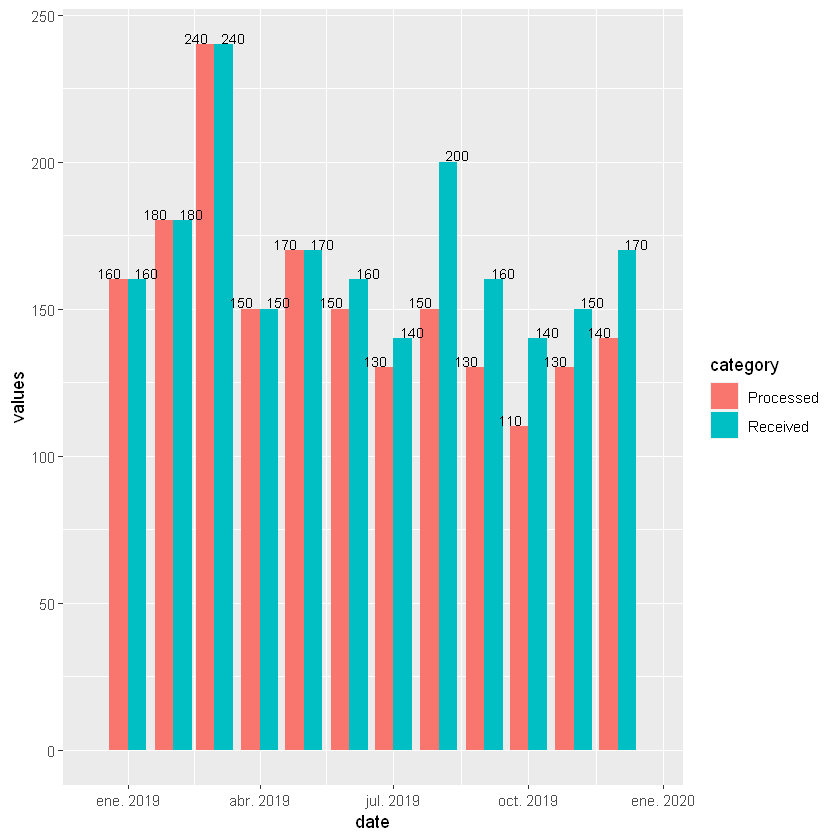

In [13]:
ggplot(df_tickets3,aes(x=date,y=values,fill=category))+
  geom_col(position = "dodge")+
  geom_text(
    aes(label=values),
    vjust=-0.1,size=3,
    position = position_dodge(50))
  
